In [1]:
# import os
# os.getcwd()
# os.chdir('/home/chtung/project_MC')

import numpy as np
import time
from tqdm import tqdm, trange
from WLM import WLChain
import matplotlib
import matplotlib.pyplot as plt
from scipy.io import savemat, loadmat

<Figure size 1152x1152 with 0 Axes>

In [2]:
## Chain parameters
# Coordinate of C atoms in each unit
# unit_C = load('b_c.dat')';
unit_C = np.zeros((3,1))

# Degree of polymerization
N_backbone = 5000

# Chain stiffness (placeholder)
a_backbone = 1

# Unit persistence
lambda_backbone = 1

kappa_list = np.array([50])
epsilon_list = [0]

parameters_list = []
S_q_list_param = []
S_q_2D_list_param = []
for kappa in kappa_list:
    for epsilon in epsilon_list:
        parameters_list.append([kappa, epsilon])
        qq = 2*np.pi*(np.linspace(2,100,50))/N_backbone

[50, 0]


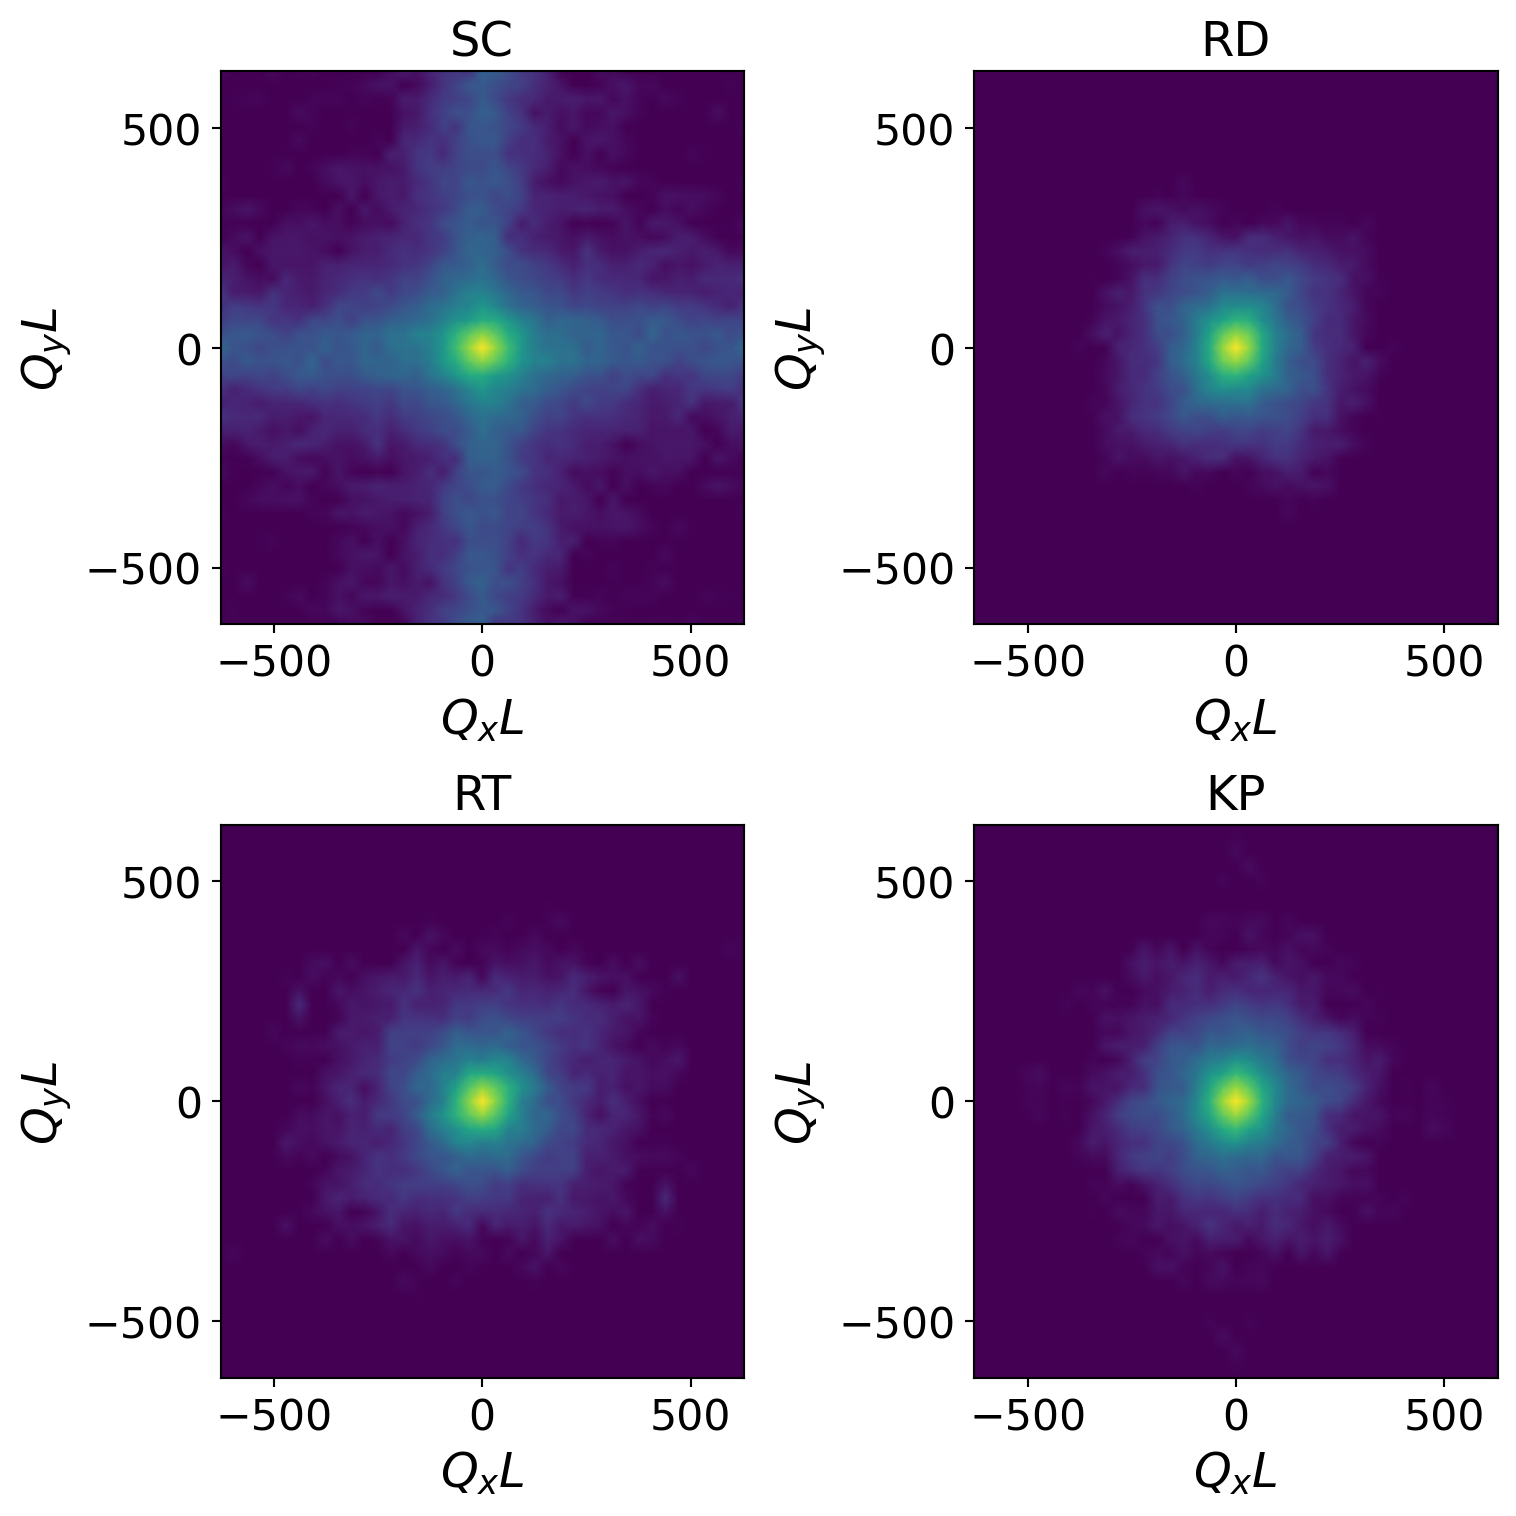

In [6]:
for j, params in enumerate(parameters_list):
    fig = plt.figure(figsize=(8, 8),dpi=192)
    kappa = params[0]
    epsilon = params[1]
    print(params)

    filename = "./mat/sq_2D_m2_64_local_{}_{}.mat".format(float(kappa),float(epsilon))
    data = loadmat(filename)
    S_q_2D_list = data["S_q_2D_list_param"][0]
    qq = data["qq"][0]
    qq_2D = np.concatenate((-np.flip(qq), np.array([0.0]), qq))
    qqx, qqy = np.meshgrid(qq_2D,qq_2D)


    for j, grid in enumerate(['SC','RD','RT']):
        ax = fig.add_subplot(2,2,j+1)
        ax.pcolormesh(qqx*N_backbone,qqy*N_backbone,np.log(S_q_2D_list[j,:,:,1]), vmax=0,vmin=-9, shading='gouraud')
        ax.set_title(grid,fontsize=18)
        ax.set_xlabel(r'$Q_xL$',fontsize=18)
        ax.set_ylabel(r'$Q_yL$',fontsize=18)
        ax.set_xticks([-500,0,500])
        ax.set_yticks([-500,0,500])
        ax.tick_params(axis='both', which='major', labelsize=16)

    ax = fig.add_subplot(2,2,4)
    ax.set_title('KP',fontsize=18)
    ax.pcolormesh(qqx*N_backbone,qqy*N_backbone,np.log(S_q_2D_list[3,:,:,1]), vmax=0,vmin=-9, shading='gouraud')
    ax.set_xlabel(r'$Q_xL$',fontsize=18)
    ax.set_ylabel(r'$Q_yL$',fontsize=18)
    ax.set_xticks([-500,0,500])
    ax.set_yticks([-500,0,500])
    ax.tick_params(axis='both', which='major', labelsize=16)

    plt.tight_layout()


[50, 0]


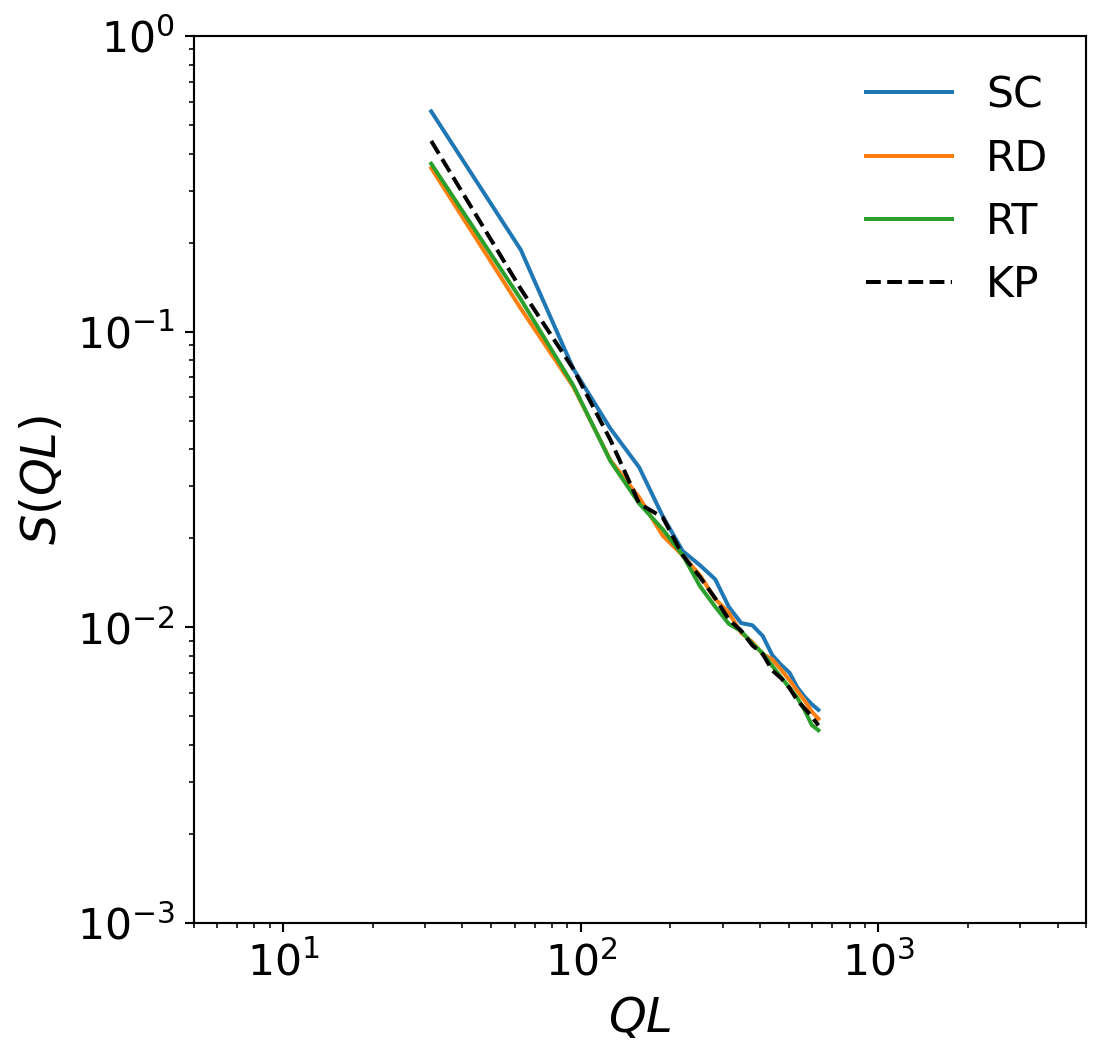

In [4]:
for i, params in enumerate(parameters_list):
    fig = plt.figure(figsize=(6,6),dpi=192)
    kappa = params[0]
    epsilon = params[1]
    print(params)

    filename = "./mat/sq_2D_test_{}_{}.mat".format(float(kappa),float(epsilon))
    data = loadmat(filename)
    S_q_list = data["S_q_list_param"][0]
    qq = data["qq"][0]

    ax = fig.add_subplot(1,1,1)
    for j, grid in enumerate(['SC','RD','RT']):
        
        ax.plot(qq*N_backbone, S_q_list[j], label=grid)

    ax.plot(qq*N_backbone, S_q_list[3], '--k', label='KP')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim([5,5e3])
    ax.set_ylim([1e-3,1])
    ax.set_xlabel(r'$QL$',fontsize=18)
    ax.set_ylabel(r'$S(QL)$',fontsize=18)
    ax.legend(frameon=False,fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=16)


In [5]:
qq_2D.shape

(41,)